In [28]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# chicago crime data file
crime_path = "Resources/chicago_crimes_all_cleaned.csv"

# Read the mouse data and put into a dataframe
crime = pd.read_csv(crime_path)
crime_df = pd.DataFrame(crime)

# Display the data table for preview
crime_df.head()

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0


In [29]:
#list all the columns available in the df
crime_df.columns

Index(['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'District', 'Ward', 'Year', 'Latitude', 'Longitude', 'Location',
       'Population', 'Zipcode'],
      dtype='object')

In [30]:
#get the counts of the "Primary Type" of crime committed
counts_crime = crime_df["Primary Type"].value_counts()
counts_crime

THEFT (ALL TYPES)                   477272
ASSAULT & BATTERY                   319103
MINOR PROPERTY CRIME                153631
OTHER MINOR CRIMES                   86070
DRUG RELATED                         42819
WEAPONS RELATED CRIME                38258
SEXUAL RELATED CRIME                 12405
OFFENSE INVOLVING CHILDREN            9795
HOMICIDE                              3406
ARSON                                 2237
KIDNAPPING AND HUMAN TRAFFICKING       703
NON-CRIMINAL (SUBJECT SPECIFIED)         3
Name: Primary Type, dtype: int64

In [63]:
# Look at which crimes were most prevalent by district
districts_grouped = crime_df.groupby(["Year"])["Primary Type"].value_counts()
district_df=pd.DataFrame(districts_grouped)

In [45]:
#remove unnecessary columns
crime_cleaned_df = crime_df[["Case Number", "Date", "Block", "Primary Type", "Description", "District", "Ward",
                                     "Year", "Latitude", "Longitude","Population","Zipcode"]]
crime_cleaned_df.head()

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,47712.0,60644.0


In [46]:
#drop rows with null (empty) values in them
counts_crime = crime_cleaned_df["Year"].value_counts()
counts_crime

2018    258975
2019    254521
2022    228867
2020    204272
2021    199067
Name: Year, dtype: int64

In [37]:
#organize heinous crimes categories (homicide, arson, kidnapping and human trafficking)
# into a dataframe and then print the results
heinous_crime = crime_cleaned_df.loc[(crime_cleaned_df["Primary Type"]=="HOMICIDE") |
                                     (crime_cleaned_df["Primary Type"]=="ARSON") |
                                     (crime_cleaned_df["Primary Type"]=="KIDNAPPING AND HUMAN TRAFFICKING"),:]
heinous_crime_df = pd.DataFrame(heinous_crime)
heinous_crime_df.head()


,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude
308,JB573872,12/31/2018 02:55:00 PM,002XX W 95TH ST,HOMICIDE,FIRST DEGREE MURDER,6,21.0,2018,41.721658,-87.628972
411,JB573584,12/31/2018 10:30:00 AM,066XX S KOMENSKY AVE,KIDNAPPING AND HUMAN TRAFFICKING,UNLAWFUL INTERFERE/VISITATION,8,13.0,2018,41.772407,-87.723820
415,JB573562,12/31/2018 10:21:00 AM,003XX E 53RD ST,HOMICIDE,FIRST DEGREE MURDER,2,3.0,2018,41.798450,-87.616858
528,JB573395,12/31/2018 03:15:00 AM,028XX W ROOSEVELT RD,ARSON,BY FIRE,11,28.0,2018,41.866507,-87.696295
1068,JB572372,12/30/2018 08:26:00 AM,066XX S LAFLIN ST,HOMICIDE,FIRST DEGREE MURDER,7,16.0,2018,41.773350,-87.661613


In [60]:
#Retrieve counts by year for each category in heinous crimes
#2018
counts_2018 = heinous_crime_df[(heinous_crime_df["Year"]==2018)]
counts_2018 = counts_2018.groupby(["Primary Type"]).size()
#2019
counts_2019 = heinous_crime_df[(heinous_crime_df["Year"]==2019)]
counts_2019 = counts_2019.groupby(["Primary Type"]).size()
#2020
counts_2020 = heinous_crime_df[(heinous_crime_df["Year"]==2020)]
counts_2020 = counts_2020.groupby(["Primary Type"]).size()
#2021
counts_2021 = heinous_crime_df[(heinous_crime_df["Year"]==2021)]
counts_2021 = counts_2021.groupby(["Primary Type"]).size()
#2022
counts_2022 = heinous_crime_df[(heinous_crime_df["Year"]==2022)]
counts_2022 = counts_2022.groupby(["Primary Type"]).size()
heinous_count = heinous_crime_df["Primary Type"].value_counts()
totals_count = crime_cleaned_df["Year"].unique()
totals_count 


array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [39]:
#organize the data into a dataframe
heinous_counts = {"2018":counts_2018,
                  "2019":counts_2019,
                  "2020":counts_2020,
                  "2021":counts_2021,
                  "2022":counts_2022,
                  "Category Totals":heinous_count}

heinous_counts_df = pd.DataFrame(heinous_counts)
heinous_counts_df

,2018,2019,2020,2021,2022,Category Totals
ARSON,368,365,574,518,412,2237
HOMICIDE,598,499,789,804,716,3406
KIDNAPPING AND HUMAN TRAFFICKING,177,182,122,93,129,703


In [40]:
#compute total crimes per year (entire dataset)
#2018
all_counts_2018 = crime_cleaned_df[(crime_cleaned_df["Year"]==2018)].count()["Primary Type"]
#2019
all_counts_2019 = crime_cleaned_df[(crime_cleaned_df["Year"]==2019)].count()["Primary Type"]
#2020
all_counts_2020 = crime_cleaned_df[(crime_cleaned_df["Year"]==2020)].count()["Primary Type"]
#2021
all_counts_2021 = crime_cleaned_df[(crime_cleaned_df["Year"]==2021)].count()["Primary Type"]
#2022
all_counts_2022 = crime_cleaned_df[(crime_cleaned_df["Year"]==2022)].count()["Primary Type"]
#overall count
overall_count = crime_cleaned_df["Primary Type"].count()


In [41]:
#calculate percentages for each year
heinous_rate_2018 = (counts_2018/all_counts_2018)*100
heinous_rate_2019 = (counts_2019/all_counts_2019)*100
heinous_rate_2020 = (counts_2020/all_counts_2020)*100
heinous_rate_2021 = (counts_2021/all_counts_2021)*100
heinous_rate_2022 = (counts_2022/all_counts_2022)*100
overall_heinous_rate = (heinous_count/overall_count)*100

In [42]:
#organize percentages into a DF
heinous_percentages = {"2018":heinous_rate_2018,
                       "2019":heinous_rate_2019,
                       "2020":heinous_rate_2020,
                       "2021":heinous_rate_2021,
                       "2022":heinous_rate_2022,
                       "Overall % of Crimes Committed (all years)":overall_heinous_rate}
heinous_percentages_df = pd.DataFrame(heinous_percentages)

#format value into percentages
heinous_percentages_df["2018"] = heinous_percentages_df["2018"].map("{:.2f}%".format)
heinous_percentages_df["2019"] = heinous_percentages_df["2019"].map("{:.2f}%".format)
heinous_percentages_df["2020"] = heinous_percentages_df["2020"].map("{:.2f}%".format)
heinous_percentages_df["2021"] = heinous_percentages_df["2022"].map("{:.2f}%".format)
heinous_percentages_df["2022"] = heinous_percentages_df["2022"].map("{:.2f}%".format)
heinous_percentages_df["Overall % of Crimes Committed (all years)"] = heinous_percentages_df["Overall % of Crimes Committed (all years)"].map("{:.2f}%".format)

heinous_percentages_df


,2018,2019,2020,2021,2022,Overall % of Crimes Committed (all years)
ARSON,0.14%,0.14%,0.28%,0.18%,0.18%,0.20%
HOMICIDE,0.23%,0.20%,0.39%,0.31%,0.31%,0.30%
KIDNAPPING AND HUMAN TRAFFICKING,0.07%,0.07%,0.06%,0.06%,0.06%,0.06%


In [43]:
homicide_by_year = heinous_crime_df["Year"].loc[(heinous_crime_df["Primary Type"]=="HOMICIDE")].value_counts().sort_index()
arson_by_year = heinous_crime_df["Year"].loc[(heinous_crime_df["Primary Type"]=="ARSON")].value_counts().sort_index()
kidnapping_by_year = heinous_crime_df["Year"].loc[(heinous_crime_df["Primary Type"]=="KIDNAPPING AND HUMAN TRAFFICKING")].value_counts().sort_index()

counts_year = {"Homicide":homicide_by_year,
               "Arson":arson_by_year,
               "Kidnapping and Human Trafficking":kidnapping_by_year,}
counts_year_df = pd.DataFrame(counts_year)
counts_year_df

,Homicide,Arson,Kidnapping and Human Trafficking
2018,598,368,177
2019,499,365,182
2020,789,574,122
2021,804,518,93
2022,716,412,129


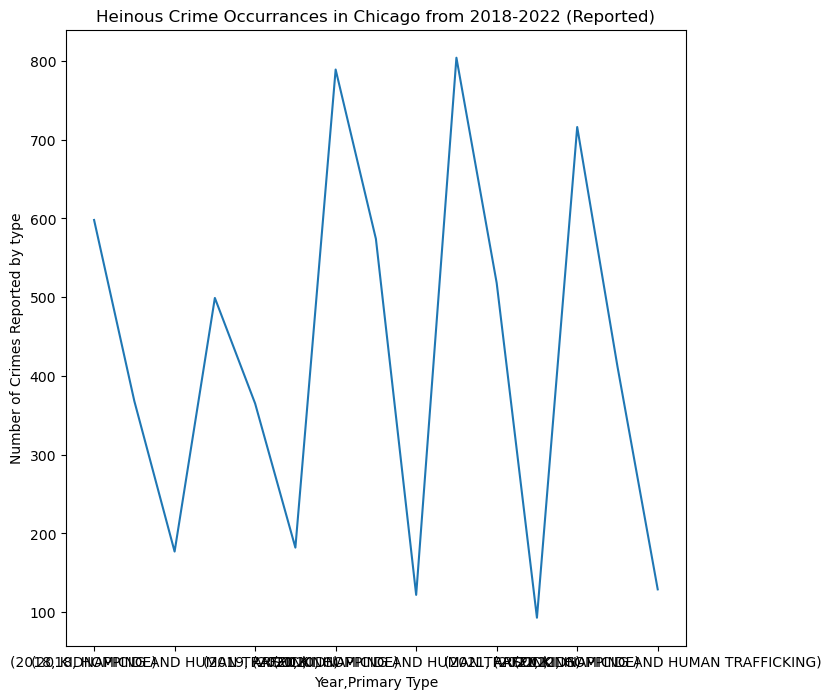

In [44]:
#Create a lineplot of the counts of each heinous crime category by year
heinous_line = heinous_crime_df.groupby(["Year"])["Primary Type"].value_counts()
heinous_line_df = pd.DataFrame(heinous_line)
heinous_line_df.plot(kind="line",figsize=(8,8),legend=False)
#set a title
plt.title("Heinous Crime Occurrances in Chicago from 2018-2022 (Reported)")
plt.ylabel("Number of Crimes Reported by type")
plt.show()